In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
from numpy.testing import assert_allclose
import os

In [2]:
def load_dir_csv(path):
    """
    Loads all .csv files in a directory
    :param path: path to directory
    :return: list of dataframes
    """
    df_list = []
    for file in os.listdir(path):
        if file.endswith(".csv"):
            df = pd.read_csv(path + file,  sep="\s*\|\s*", engine="python", skiprows=[3, 6])
            df_list.append(df)

    result = pd.concat(df_list, ignore_index=True)
    return result

In [3]:
df = load_dir_csv("./bemchmark_results/")

In [4]:
df

,N_tasks,N_points,N_t,name,time_sec,max_err
0,1,10000,1000000,simple,33.911709,0.156145
1,1,10000,1000000,async,34.145320,0.156145
2,1,25000,1000000,simple,90.155820,0.156195
3,1,25000,1000000,async,85.201647,0.156195
4,1,50000,1000000,simple,179.600337,0.156236
5,1,50000,1000000,async,167.170669,0.156236
6,2,10000,1000000,simple,22.985196,0.156145
7,2,10000,1000000,async,21.891860,0.156145
8,2,25000,1000000,simple,54.449501,0.156195
9,2,25000,1000000,async,53.432266,0.156195


## Замеры времени

In [5]:
n_pts = df.N_points.unique()
funcs = df.name.unique()
n_tasks = df.N_tasks.unique()

In [11]:
n_tasks.sort()
n_tasks

array([ 1,  2,  4,  8, 16, 24])

#### Распределение задач
Все запуски проводились на узлах типа а, со следующими конфигурациями\
| всего задач  | число узлов | задачи на узел |
|:------------:|:----:|:--------------:|
| 1  |  1  |        1 |
|  2 |  1  |        2 |
|  4 |  1  |        4 |
|  8 |  4  |        2 |
|  16 |  4  |        4 |
|  24 |  4  |        6 |
  

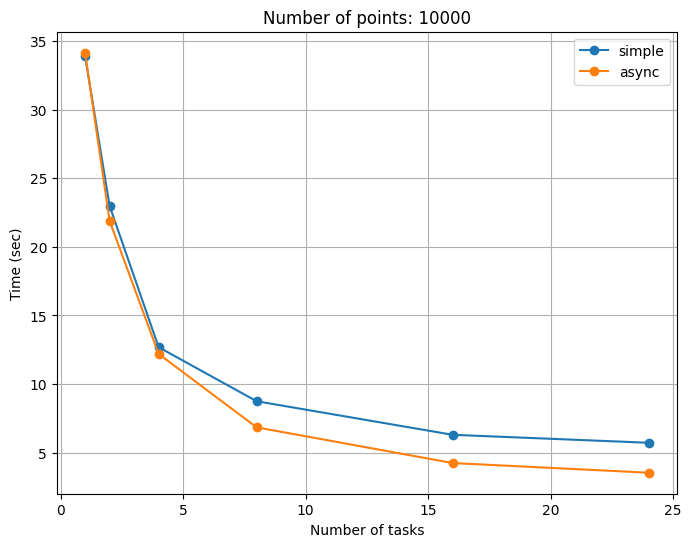

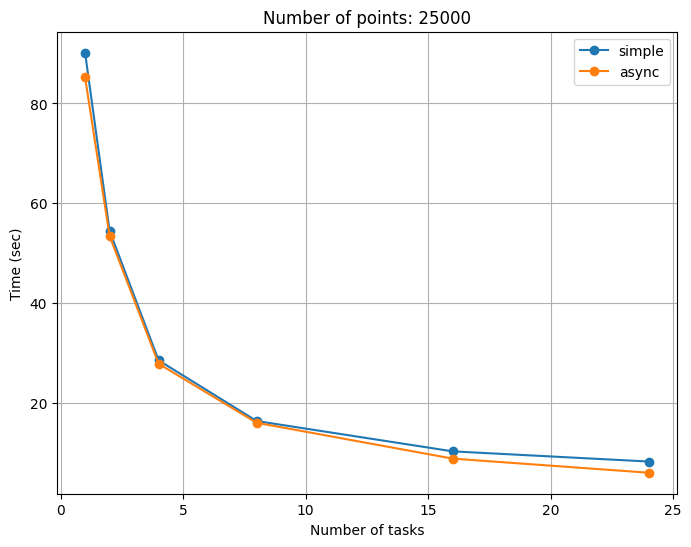

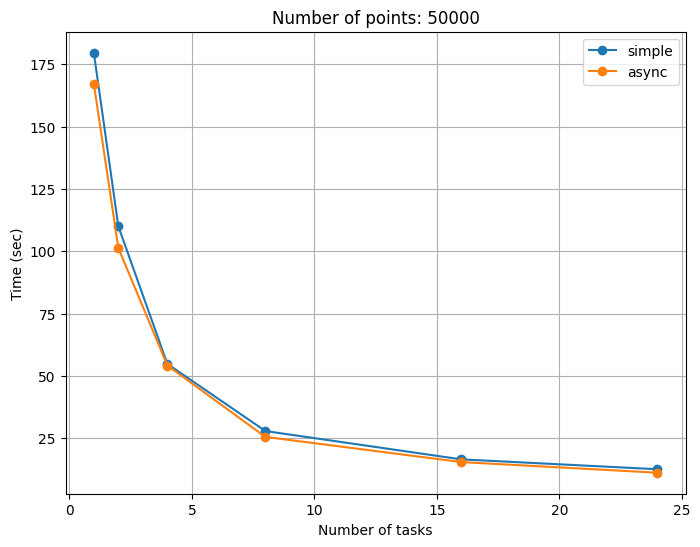

In [6]:
for pts in n_pts:
    df_cur = df.loc[df['N_points'] == pts]
    plt.figure(figsize=(8, 6))
    for func in funcs:
        df_cur_func = df_cur.loc[df_cur['name'] == func]
        df_cur_func = df_cur_func.sort_values(by='N_tasks')
        plt.plot(df_cur_func['N_tasks'], df_cur_func['time_sec'], "-o", label=func)

    plt.xlabel('Number of tasks')
    plt.ylabel('Time (sec)')
    plt.title(f'Number of points: {pts}')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

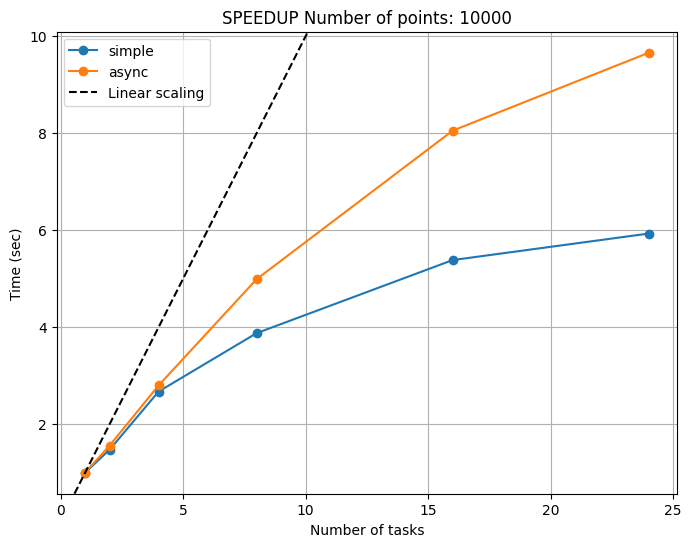

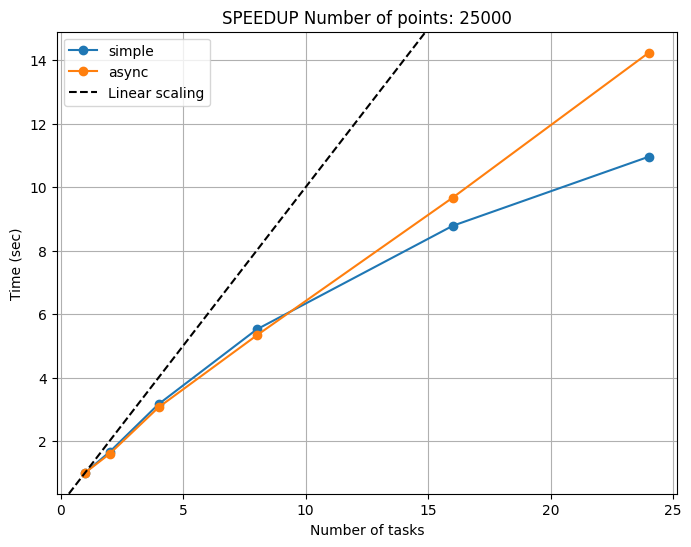

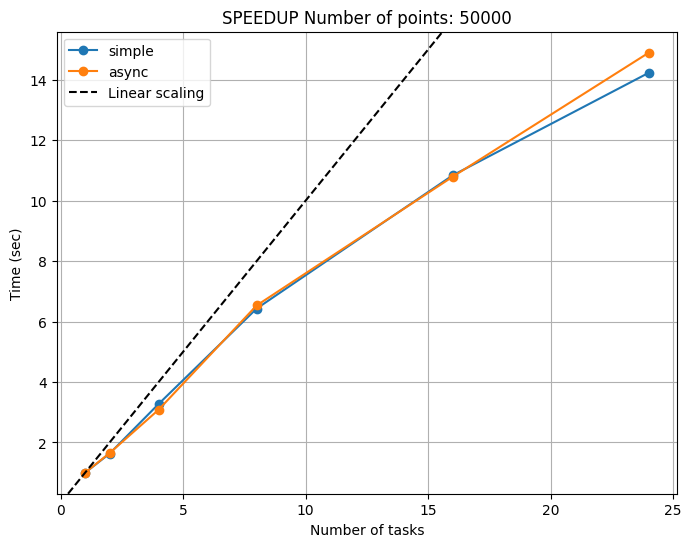

In [7]:
for pts in n_pts:
    df_cur = df.loc[df['N_points'] == pts]
    plt.figure(figsize=(8, 6))
    for func in funcs:
        df_cur_func = df_cur.loc[df_cur['name'] == func]
        df_cur_func = df_cur_func.sort_values(by='N_tasks')
        plt.plot(df_cur_func['N_tasks'], df_cur_func['time_sec'].iloc[0] / df_cur_func['time_sec'], "-o", label=func)

    plt.axline((1, 1), slope=1, color='black', linestyle='--', label='Linear scaling')
    plt.xlabel('Number of tasks')
    plt.ylabel('Time (sec)')
    plt.title(f'SPEEDUP Number of points: {pts}')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()